In [1]:
# Gets the data

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-02 20:07:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-02 20:07:43 (5.38 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
#Read the data

data = pd.read_csv('AER_credit_card_data.csv')
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [24]:
# Data target prep
data['card'] = (data['card'] == 'yes').astype(int)

In [25]:
# Splitting the dataset in train, val and test
train_subset, val = train_test_split(data, test_size=0.2, random_state=1)
train, test = train_test_split(train_subset, test_size=0.25, random_state=1)

train.shape[0], val.shape[0], test.shape[0]

(791, 264, 264)

In [26]:
#Q1
for num_var in ['reports', 'dependents', 'active', 'share']:
    roc_score = roc_auc_score(train['card'], train[num_var])
    if roc_score < 0.5:
        roc_score = roc_auc_score(train['card'], -train[num_var])

    print(f'roc score for var {num_var} is {round(roc_score,4)}')

train[['reports', 'dependents', 'active', 'share'] + ['card']].corr()

roc score for var reports is 0.7167
roc score for var dependents is 0.5328
roc score for var active is 0.6043
roc score for var share is 0.9892


,reports,dependents,active,share,card
reports,1.000000,0.047284,0.193648,-0.184150,-0.448771
dependents,0.047284,1.000000,0.111082,-0.081944,-0.056133
active,0.193648,0.111082,1.000000,-0.018890,0.107173
share,-0.184150,-0.081944,-0.018890,1.000000,0.406993
card,-0.448771,-0.056133,0.107173,0.406993,1.000000


In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
# Model features
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
target = 'card'
train[features].dtypes

reports          int64
age            float64
income         float64
share          float64
expenditure    float64
dependents       int64
months           int64
majorcards       int64
active           int64
owner           object
selfemp         object
dtype: object

In [30]:
# Data preperation
train_dict = train[features].to_dict(orient='records')
val_dict = val[features].to_dict(orient='records')
test_dict = test[features].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

y_train = train[target].values
y_val = val[target].values
y_test = test[target].values

In [31]:
# Model training
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
# Q2 Evaluation
y_pred = model.predict_proba(X_val)
auc_score = roc_auc_score(y_true=y_val, y_score=y_pred[:,1])
print(f"auc score is {round(auc_score, 3)}")

auc score is 0.995


In [90]:
# Thresholds 
thresholds = np.linspace(0.0, 1.0, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [92]:
from sklearn.metrics import precision_score, recall_score
scores = []
for t in thresholds:
    precision = precision_score(y_val, y_pred[:,1] >= t)
    recall = recall_score(y_val, y_pred[:,1] >= t)

    scores.append((round(t,2), precision, recall))

df = pd.DataFrame(data=scores, columns=['threshold', 'precision', 'recall'])


In [93]:
for i in df.index:
    print(df.iloc[i])

threshold    0.00
precision    0.75
recall       1.00
Name: 0, dtype: float64
threshold    0.010000
precision    0.814815
recall       1.000000
Name: 1, dtype: float64
threshold    0.020000
precision    0.835443
recall       1.000000
Name: 2, dtype: float64
threshold    0.03000
precision    0.86087
recall       1.00000
Name: 3, dtype: float64
threshold    0.040000
precision    0.876106
recall       1.000000
Name: 4, dtype: float64
threshold    0.050000
precision    0.887892
recall       1.000000
Name: 5, dtype: float64
threshold    0.06
precision    0.90
recall       1.00
Name: 6, dtype: float64
threshold    0.07000
precision    0.90411
recall       1.00000
Name: 7, dtype: float64
threshold    0.080000
precision    0.903670
recall       0.994949
Name: 8, dtype: float64
threshold    0.090000
precision    0.903226
recall       0.989899
Name: 9, dtype: float64
threshold    0.100000
precision    0.907407
recall       0.989899
Name: 10, dtype: float64
threshold    0.110000
precision    0.91

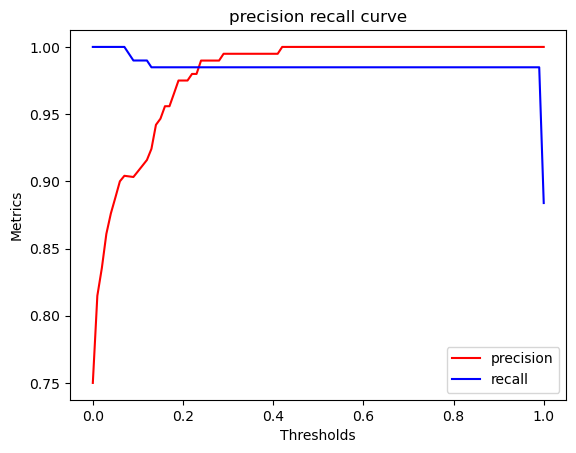

In [82]:
# Plotting the curves
plt.plot(df.threshold, df.precision, color='r', label='precision')
plt.plot(df.threshold, df.recall, color='b', label='recall')
plt.xlabel('Thresholds')
plt.ylabel('Metrics')
plt.title('precision recall curve')
plt.legend()

In [97]:
# Q4
from sklearn.metrics import f1_score
scores = []
for t in thresholds:
    precision = precision_score(y_val, y_pred[:,1] >= t)
    recall = recall_score(y_val, y_pred[:,1] >= t)
    f1 = 2 * ((precision*recall)/(precision+recall))

    scores.append((round(t,2), f1))

df2 = pd.DataFrame(data=scores, columns=['threshold', 'f1_score'])
df2[df2.threshold.isin([0.1, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]) == True]

,threshold,f1_score
10,0.1,0.946860
40,0.4,0.989848
60,0.6,0.992366
70,0.7,0.992366
80,0.8,0.992366
90,0.9,0.992366
100,1.0,0.938338


In [98]:
# Q5
from sklearn.model_selection import KFold

In [99]:
folds = KFold(n_splits=5, shuffle=True, random_state=1)

In [100]:
scores = []
for train_idx, val_idx in folds.split(train_subset):

    # Data preperation
    train = train_subset.iloc[train_idx]
    val = train_subset.iloc[val_idx]

    train_dict = train[features].to_dict(orient='records')
    val_dict = val[features].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    y_train = train[target].values
    y_val = val[target].values
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)

    scores.append(score)


print(np.std(scores))


    

0.0027434713804377724


In [105]:
from statistics import mode


model_scores = []
for C in [0.01, 0.1, 1, 10]:
    scores = []
    for train_idx, val_idx in folds.split(train_subset):

        # Data preperation
        train = train_subset.iloc[train_idx]
        val = train_subset.iloc[val_idx]

        train_dict = train[features].to_dict(orient='records')
        val_dict = val[features].to_dict(orient='records')

        dv = DictVectorizer()
        X_train = dv.fit_transform(train_dict)
        X_val = dv.transform(val_dict)

        y_train = train[target].values
        y_val = val[target].values
        
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:,1]
        score = roc_auc_score(y_val, y_pred)

        scores.append(score)
    model_scores.append((C, round(np.mean(scores),3), round(np.std(scores),3)))

df3 = pd.DataFrame(data=model_scores, columns=['C', 'mean_auc', 'std_auc'])


In [106]:
df3

,C,mean_auc,std_auc
0,0.01,0.992,0.006
1,0.10,0.995,0.004
2,1.00,0.996,0.003
3,10.00,0.996,0.003
